In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
from scipy.integrate import odeint
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [2]:
#全球海面年均CO2浓度
CO2_sea_concentration = pd.read_csv(r'D:\ESE2024\ESE2024\CO2_annmean.csv')
CO2_sea_concentration.info

<bound method DataFrame.info of     year    mean   unc
0   1979  336.85  0.11
1   1980  338.91  0.07
2   1981  340.11  0.09
3   1982  340.86  0.03
4   1983  342.53  0.05
5   1984  344.07  0.07
6   1985  345.54  0.07
7   1986  346.97  0.08
8   1987  348.68  0.10
9   1988  351.16  0.07
10  1989  352.79  0.07
11  1990  354.06  0.06
12  1991  355.39  0.06
13  1992  356.09  0.07
14  1993  356.83  0.07
15  1994  358.33  0.08
16  1995  360.17  0.05
17  1996  361.93  0.04
18  1997  363.05  0.04
19  1998  365.70  0.05
20  1999  367.79  0.06
21  2000  368.96  0.06
22  2001  370.57  0.04
23  2002  372.58  0.04
24  2003  375.14  0.04
25  2004  376.95  0.05
26  2005  378.98  0.05
27  2006  381.15  0.05
28  2007  382.90  0.05
29  2008  385.02  0.04
30  2009  386.50  0.04
31  2010  388.75  0.06
32  2011  390.62  0.05
33  2012  392.65  0.07
34  2013  395.40  0.06
35  2014  397.34  0.05
36  2015  399.65  0.05
37  2016  403.06  0.07
38  2017  405.22  0.08
39  2018  407.61  0.07
40  2019  410.07  0.08
41

In [3]:
#大气中CO2浓度观测数据
CO2_atm_concentration = pd.read_csv(r'D:\ESE2024\ESE2024\CO2_annmean_mlo2.csv')
CO2_atm_concentration.info

<bound method DataFrame.info of     year    mean   unc
0   1959  315.98  0.12
1   1960  316.91  0.12
2   1961  317.64  0.12
3   1962  318.45  0.12
4   1963  318.99  0.12
..   ...     ...   ...
60  2019  411.65  0.12
61  2020  414.21  0.12
62  2021  416.41  0.12
63  2022  418.53  0.12
64  2023  421.08  0.12

[65 rows x 3 columns]>

In [4]:
#1751-2014全球CO2年均排放
emissions = pd.read_csv(r'D:\ESE2024\ESE2024\global.1751_2014yes.csv')
emissions.info

<bound method DataFrame.info of      Year  Total   Gas  Liquids  Solids  Production  Flaring  Capita
0    1751      3     0        0       3           0        0     NaN
1    1752      3     0        0       3           0        0     NaN
2    1753      3     0        0       3           0        0     NaN
3    1754      3     0        0       3           0        0     NaN
4    1755      3     0        0       3           0        0     NaN
..    ...    ...   ...      ...     ...         ...      ...     ...
259  2010   9128  1696     3107    3812         446       67    1.32
260  2011   9503  1756     3134    4055         494       64    1.36
261  2012   9673  1783     3200    4106         519       65    1.36
262  2013   9773  1806     3220    4126         554       68    1.36
263  2014   9855  1823     3280    4117         568       68    1.36

[264 rows x 8 columns]>

In [13]:
#1.1
k12=105/740
k21=102/900

N1_0 = 347  
N2_0 = 422.54 
y0 = [N1_0, N2_0]

gamma_data = emissions.loc[(emissions['Year'] >= 1987) & (emissions['Year'] <= 2004), 
                      ['Year', 'Total']]

gamma_data['gamma'] = gamma_data.iloc[:, 1] / 1000 / 2.13

def get_gamma(t):
    years = gamma_data['Year'] - 1987  # Adjust years to start from 0
    gamma_values = gamma_data['gamma']
    return np.interp(t, years, gamma_values)
    
# 定义模型  
def model(y, t):  
    N1, N2 = y  
    gamma = get_gamma(t)
    dN1_dt = -k12 * N1 + k21 * N2 + gamma  
    dN2_dt = k12 * N1 - k21 * N2  
    return [dN1_dt, dN2_dt]  
     
# 创建时间数组，只包含1987到2004年  
# 假设phi的长度是对应每年的数据  
start_year = 1987  
end_year = 2004  
years = np.arange(start_year, end_year + 1)  
t = np.linspace(0, len(years) - 1, len(years))  # 创建相应的时间数组  

# 解微分方程 
solution = odeint(model, y0, t,) 

# 输出结果  
atmospheric_co2 = solution[:, 0]  # 大气中的CO2浓度  

# 打印结果  
print("Atmospheric CO2 levels (1987-2004):", atmospheric_co2)  

Atmospheric CO2 levels (1987-2004): [347.         348.36940347 349.77856414 351.18179366 352.57095246
 353.93425774 355.26187948 356.59729955 357.97109851 359.38862261
 360.84117839 362.29952888 363.73868052 365.19745084 366.71255143
 368.26328888 369.89814329 371.66640839]


In [12]:
#1.2
k12=105/809
k21=102/821

N2_eq = 821/2.13  # Ocean equilibrium value 821PgC = 900 − 79)
xi = 3  # Example buffer factor, modify as necessary

N1_0 = 809/2.13  # Atmospheric CO2 concentration in 1987 (809PgC)
N2_0 = 821/2.13  # Approximate ocean surface CO2 (821PgC)
y0 = [N1_0, N2_0]

gamma_data = emissions.loc[(emissions['Year'] >= 1987) & (emissions['Year'] <= 2004), 
                      ['Year', 'Total']]

gamma_data['gamma'] = gamma_data.iloc[:, 1] / 1000 / 2.13

def get_gamma(t):
    years = gamma_data['Year'] - 1987  # Adjust years to start from 0
    gamma_values = gamma_data['gamma']
    return np.interp(t, years, gamma_values)
    
# 定义模型  
def model(y, t):  
    N1, N2 = y  
    gamma = get_gamma(t)
    dN1_dt = -k12 * N1 + k21 * (N2_eq + xi * (N2 - N2_eq)) + gamma
    dN2_dt = k12 * N1 - k21 * (N2_eq + xi * (N2 - N2_eq))  
    return [dN1_dt, dN2_dt]  
     
# 创建时间数组，只包含1987到2004年  
# 假设phi的长度是对应每年的数据  
start_year = 1987  
end_year = 2004  
years = np.arange(start_year, end_year + 1)  
t = np.linspace(0, len(years) - 1, len(years))  # 创建相应的时间数组  

# 解微分方程 
solution = odeint(model, y0, t,) 

# 输出结果  
atmospheric_CO2 = solution[:, 0]  # 大气中的CO2浓度  

# 打印结果  
print("Atmospheric CO2 levels (1987-2004):", atmospheric_CO2)  

Atmospheric CO2 levels (1987-2004): [379.81220657 381.29200455 383.06454859 384.99247958 387.01087423
 389.07251443 391.14448538 393.25522621 395.42651486 397.65919051
 399.94255489 402.24632996 404.54424972 406.87349243 409.27055968
 411.71556373 414.25806136 416.95060616]


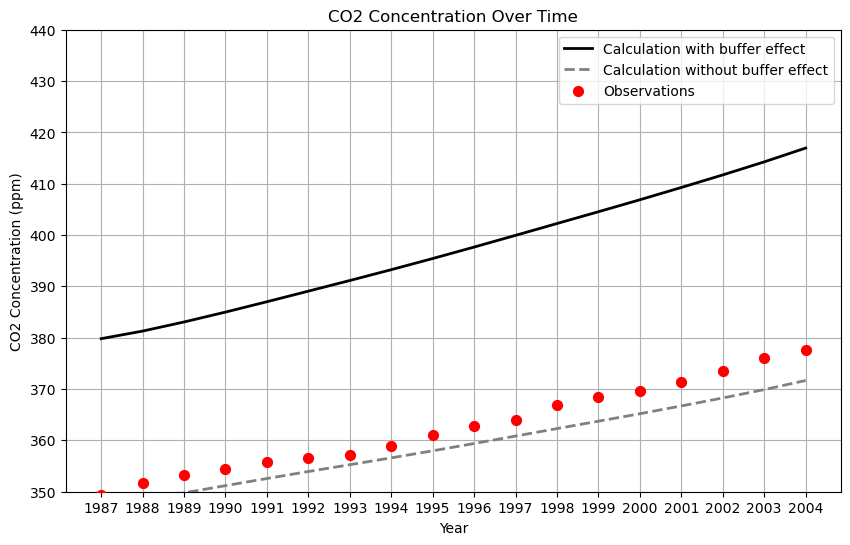

In [15]:
#1.3
years = np.arange(1987, 2005)  # 年份从1987到2004  

atmospheric_co2_with_buffer = atmospheric_CO2   
atmospheric_co2_without_buffer = atmospheric_co2  
observations = np.array([349.31, 351.69, 353.2, 354.45, 355.7, 356.54, 357.21, 358.96, 360.97, 362.74, 363.88, 366.84, 368.54,369.71,371.32,373.45,375.98,377.7]) 

# 设置绘图  
plt.figure(figsize=(10, 6))  

# 画含缓冲效应的结果  
plt.plot(years, atmospheric_co2_with_buffer, color='black', label='Calculation with buffer effect', linewidth=2)  

# 画无缓冲效应的结果  
plt.plot(years, atmospheric_co2_without_buffer, color='gray', linestyle='--', label='Calculation without buffer effect', linewidth=2)  

# 画观测值  
plt.scatter(years, observations, color='red', label='Observations', s=50,zorder=5)  

# 设置图的标题与标签  
plt.title('CO2 Concentration Over Time')  
plt.xlabel('Year')  
plt.ylabel('CO2 Concentration (ppm)')  
plt.xticks(years)  # 设置X轴刻度为每年  
plt.ylim(350, 440)  # 设置y轴范围  
plt.grid(True)  # 添加网格  
plt.legend()  # 显示图例  

# 显示图形  
plt.show() 

1.1和1.2借助了AI以及刘京朋、何兆轩同学的帮助完成。